In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Flight delays; a single sample

In [2]:
united = Table.read_table('http://inferentialthinking.com/notebooks/united_summer2015.csv')

In [3]:
la = united.where('Destination', 'LAX')

In [4]:
sample_from_population = la.sample(100, with_replacement=False)

In [5]:
np.median(sample_from_population['Delay'])

1.5

## Variability among samples

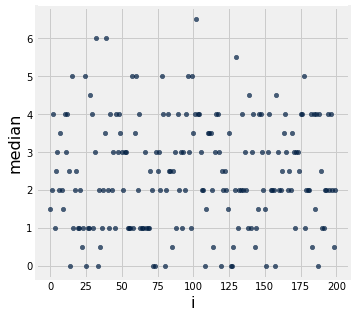

In [6]:
medians = []
repetitions = np.arange(200)
for i in repetitions: # examine 200 samples
    sample = la.sample(100, with_replacement=False)
    medians.append(np.median(sample['Delay']))

Table().with_columns('i', repetitions, 'median', medians).scatter(0)

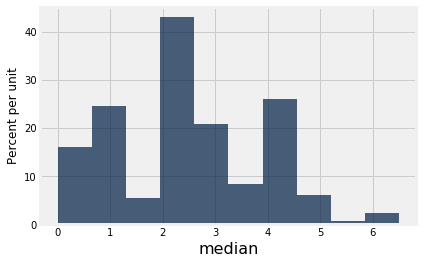

In [7]:
Table().with_columns('median', medians).hist(0)

In [8]:
percentile(2.5, medians)

0.0

In [9]:
percentile(97.5, medians)

5.0

In [10]:
print("95% of sample medians were between", 
      percentile(2.5, medians),
      "and",
      percentile(97.5, medians))

95% of sample medians were between 0.0 and 5.0


## Predicting the accuracy of our estimate -- the bootstrap

In [11]:
sample_from_population # from now on, this is all we have

Date,Flight Number,Destination,Delay
8/4/15,1960,LAX,0
8/27/15,1956,LAX,-1
8/16/15,887,LAX,2
6/12/15,1232,LAX,4
8/27/15,1579,LAX,3
8/10/15,1004,LAX,32
6/19/15,1960,LAX,0
8/25/15,1788,LAX,-3
6/24/15,816,LAX,17
8/15/15,479,LAX,1


In [12]:
np.median(sample_from_population['Delay'])

1.5

In [13]:
resample_1 = sample_from_population.sample()
resample_1.show(3)

Date,Flight Number,Destination,Delay
6/27/15,570,LAX,-7
8/12/15,1579,LAX,122
6/18/15,1136,LAX,45


In [14]:
np.median(resample_1['Delay'])

1.0

In [15]:
resample_2 = sample_from_population.sample()
resample_2.show(3)

Date,Flight Number,Destination,Delay
6/15/15,1136,LAX,13
8/12/15,1579,LAX,122
6/19/15,1960,LAX,0


In [16]:
np.median(resample_2['Delay'])

0.0

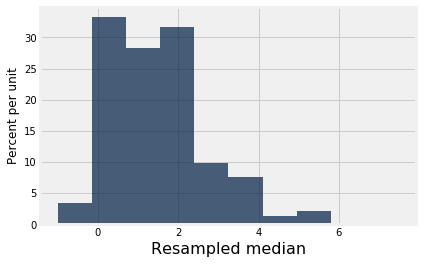

In [17]:
resampled_medians = make_array()
for i in np.arange(5000):
    resample = sample_from_population.sample()
    median = np.median(resample['Delay'])
    resampled_medians = np.append(resampled_medians, median)
    
Table().with_column('Resampled median', resampled_medians).hist(0)

## Confidence intervals

In [18]:
print("95% of resampled medians were between", 
      percentile(2.5, resampled_medians),
      "and",
      percentile(97.5, resampled_medians))

95% of resampled medians were between -0.5 and 4.5


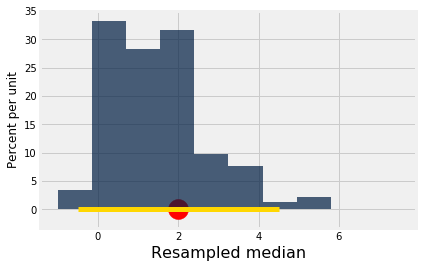

In [19]:
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist(0)
plots.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(la['Delay'])
plots.scatter(pop_median, 0, color='red', s=400)

In [20]:
def bootstrap_median(sample_from_pop):
    resampled_medians = make_array()
    for i in np.arange(5000):
        resample = sample_from_pop.sample()
        median = np.median(resample['Delay'])
        resampled_medians = np.append(resampled_medians, median)
    return resampled_medians

def plot_bootstrap(sample_from_pop):
    resampled_medians = bootstrap_median(sample_from_pop)
    interval_95 = [percentile(2.5, resampled_medians),
                   percentile(97.5, resampled_medians)]
    Table().with_column('Resampled median', resampled_medians).hist(0)
    plots.plot(interval_95, [0, 0], color='gold', lw=5)
    pop_median = np.median(la['Delay'])
    plots.scatter(pop_median, 0, color='red', s=400)

In [21]:
different_sample_from_population = la.sample(100)
print('Sample median:', np.median(different_sample_from_population['Delay']))

Sample median: 2.5


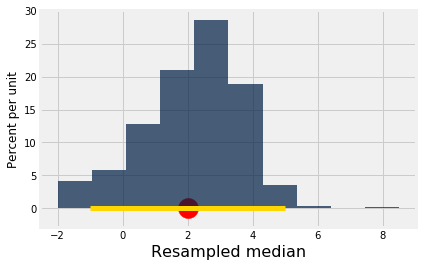

In [22]:
plot_bootstrap(different_sample_from_population)

In [23]:
# THE BIG SIMULATION: This one takes several minutes.

# Generate 100 intervals, in the table intervals

left_ends = make_array()
right_ends = make_array()

for i in np.arange(100):
    sample_from_pop = la.sample(100, with_replacement=False)
    medians = bootstrap_median(sample_from_pop)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)

In [24]:
intervals

Left,Right
0,4
0,6.5
2,12
-0.5,5
-1,3.5
-2,3
0,6
2,6.5
0,11
0,8


In [25]:
intervals.where('Left', are.below(pop_median)).where('Right', are.above(pop_median)).num_rows

88

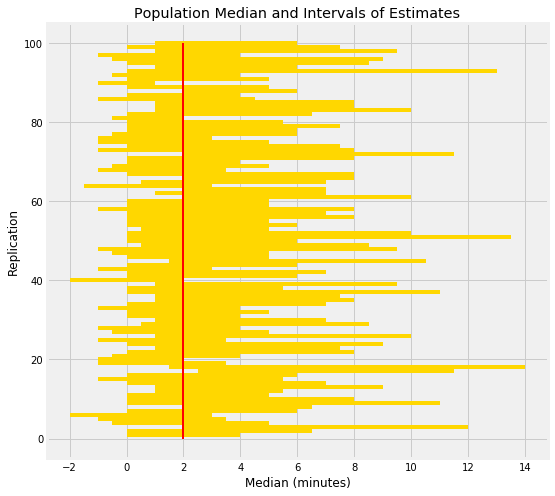

In [26]:
replication_number = np.ndarray.astype(np.arange(1, 101), str)

intervals2 = Table(replication_number).with_rows(make_array(left_ends, right_ends))

plots.figure(figsize=(8,8))
n=100
for i in np.arange(n):
    ends = intervals2.column(i)
    plots.plot(ends, make_array(i+1, i+1), color='gold')
plots.plot(make_array(pop_median, pop_median), make_array(0, n), color='red', lw=2)
plots.xlabel('Median (minutes)')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');